# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys_BOOOOOTH import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


In [3]:
lat_lngs[0:10]

[(-45.57011533995007, 167.06261490013253),
 (28.973565588022282, -175.5899801391675),
 (7.870854906886748, -135.180959762814),
 (-72.64353663868698, -16.125015480660522),
 (-84.30413787875798, -137.21118922753422),
 (-48.12131275019594, -37.63369003715212),
 (27.524387645596036, 40.83468077625858),
 (-41.698430868030684, -127.53648889726634),
 (-64.98726471630305, 85.21321369154913),
 (73.74419011835977, -158.38149286601714)]

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
city = cities[0]
city

'invercargill'

In [5]:
city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
response = requests.get(city_url)
city_weather = response.json()
city_weather

{'coord': {'lon': 168.35, 'lat': -46.4},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 51.03,
  'feels_like': 49.41,
  'temp_min': 51.03,
  'temp_max': 51.03,
  'pressure': 1010,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 18.99, 'deg': 200, 'gust': 32.99},
 'clouds': {'all': 79},
 'dt': 1700006949,
 'sys': {'type': 2,
  'id': 2008959,
  'country': 'NZ',
  'sunrise': 1699981472,
  'sunset': 1700035066},
 'timezone': 46800,
 'id': 2189529,
 'name': 'Invercargill',
 'cod': 200}

In [6]:
city_lat = city_weather["coord"]["lat"]
# city_lat = city_weather.get("coord", {}).get("lat", None)

city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

In [7]:
{"City": city, 
  "Lat": city_lat, 
  "Lng": city_lng, 
  "Max Temp": city_max_temp,
  "Humidity": city_humidity,
  "Cloudiness": city_clouds,
  "Wind Speed": city_wind,
  "Country": city_country,
  "Date": city_date}

{'City': 'invercargill',
 'Lat': -46.4,
 'Lng': 168.35,
 'Max Temp': 51.03,
 'Humidity': 76,
 'Cloudiness': 79,
 'Wind Speed': 18.99,
 'Country': 'NZ',
 'Date': 1700006949}

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:50]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print(f"City {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | taiohae
'coord'
City taiohae not found. Skipping...
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | ha'il
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | puerto san carlos
'coord'
City puerto san carlos not found. Skipping...
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | kailua-kona
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | shenjiamen
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | songjiang
Processing Record 19 of Set 1 | simcoe
Processing Record 20 of Set 1 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          48
Lat           48
Lng           48
Max Temp      48
Humidity      48
Cloudiness    48
Wind Speed    48
Country       48
Date          48
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,51.03,76,79,18.99,NZ,1700006949
1,wailua homesteads,22.0669,-159.3780,84.63,71,75,23.02,US,1700007291
2,grytviken,-54.2811,-36.5092,37.26,92,81,1.52,GS,1700007292
3,waitangi,-43.9535,-176.5597,59.83,88,82,3.00,NZ,1700007293
4,ha'il,27.5219,41.6907,62.62,100,0,6.91,SA,1700007293


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_booooth.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_booooth.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,51.03,76,79,18.99,NZ,1700006949
1,wailua homesteads,22.0669,-159.3780,84.63,71,75,23.02,US,1700007291
2,grytviken,-54.2811,-36.5092,37.26,92,81,1.52,GS,1700007292
3,waitangi,-43.9535,-176.5597,59.83,88,82,3.00,NZ,1700007293
4,ha'il,27.5219,41.6907,62.62,100,0,6.91,SA,1700007293


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

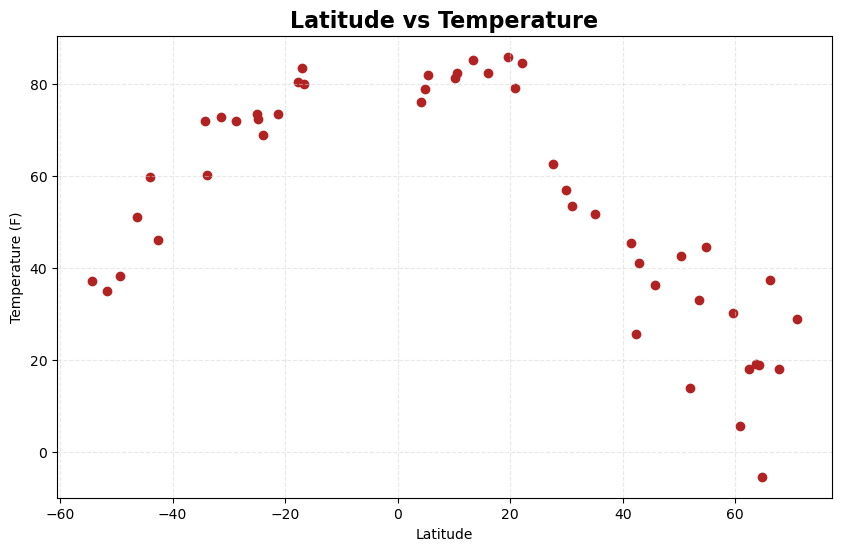

In [15]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Save the figure
plt.savefig("output_data/Fig1_BOOOOTH.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

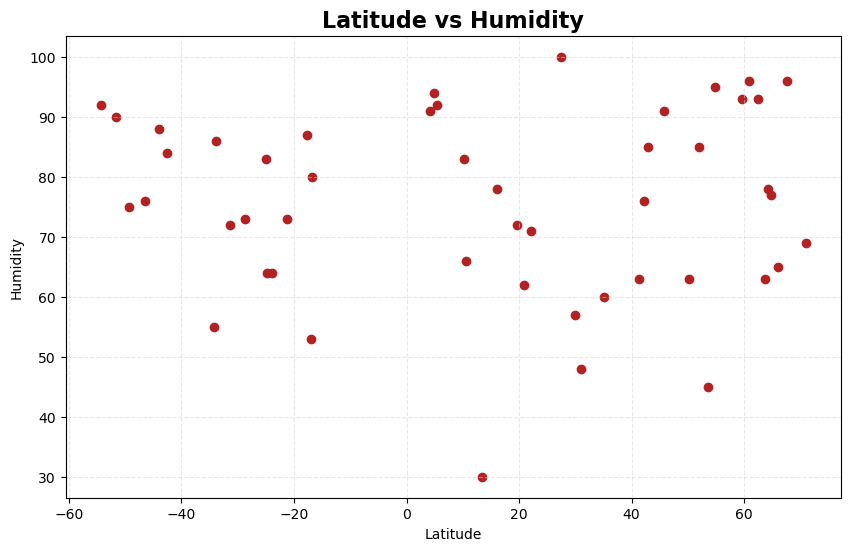

In [16]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Humidity"], color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Save the figure
plt.savefig("output_data/Fig2_BOOOTH.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

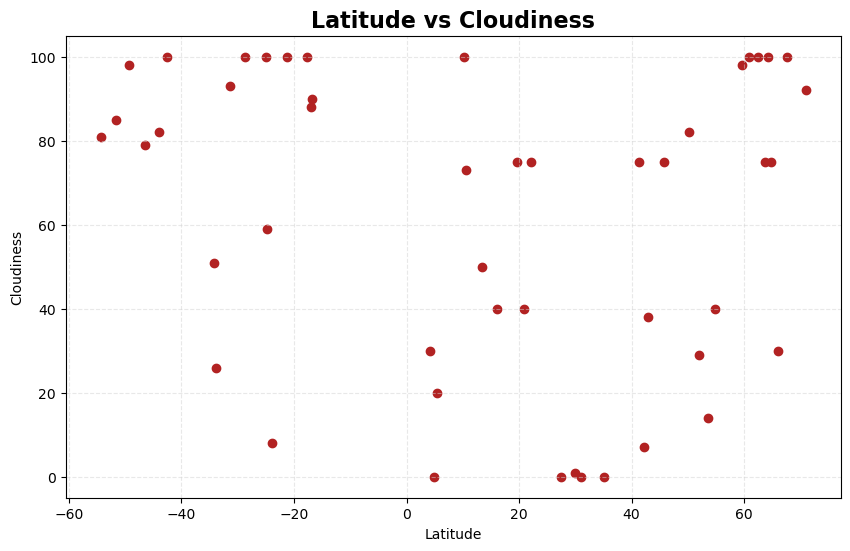

In [17]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Cloudiness"], color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Save the figure
plt.savefig("output_data/Fig3_BOOOOTH.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

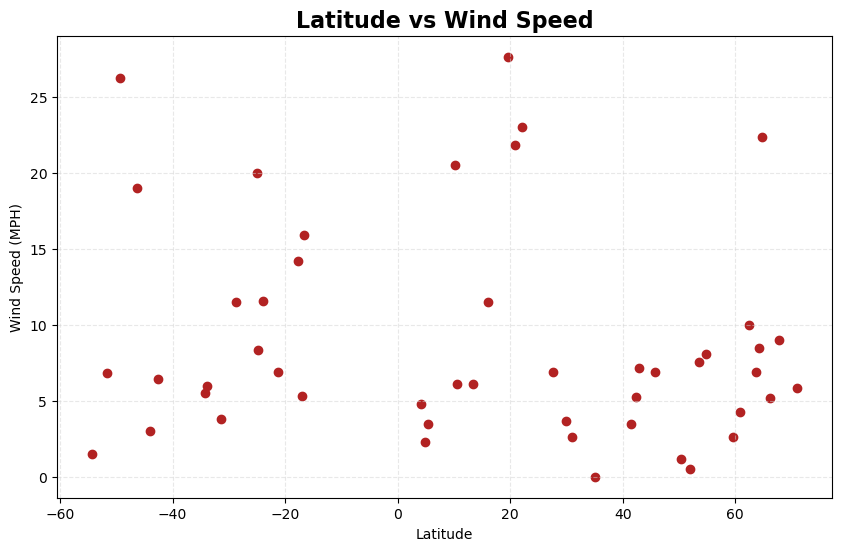

In [18]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Save the figure
plt.savefig("output_data/Fig4_BOOOOTH.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def makeLinearRegressionPlot(x_values, y_values, y_col, hemi, annot_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # make plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, annot_loc, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_col}')
    plt.title(f'Latitude vs {y_col} ({hemi} Hemi)')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,84.63,71,75,23.02,US,1700007291
4,ha'il,27.5219,41.6907,62.62,100,0,6.91,SA,1700007293
7,bethel,41.3712,-73.4140,45.48,63,75,3.44,US,1700007295
8,anadyr,64.7500,177.4833,-5.30,77,75,22.37,RU,1700007295
9,stanley,54.8680,-1.6985,44.71,95,40,8.05,GB,1700007112


In [20]:
northern_hemi_df.count()

City          31
Lat           31
Lng           31
Max Temp      31
Humidity      31
Cloudiness    31
Wind Speed    31
Country       31
Date          31
dtype: int64

In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,51.03,76,79,18.99,NZ,1700006949
2,grytviken,-54.2811,-36.5092,37.26,92,81,1.52,GS,1700007292
3,waitangi,-43.9535,-176.5597,59.83,88,82,3.00,NZ,1700007293
5,adamstown,-25.0660,-130.1015,73.47,83,100,19.98,PN,1700007294
6,port-aux-francais,-49.3500,70.2167,38.37,75,98,26.22,TF,1700007294


In [22]:
southern_hemi_df.count()

City          17
Lat           17
Lng           17
Max Temp      17
Humidity      17
Cloudiness    17
Wind Speed    17
Country       17
Date          17
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.8384288558198489


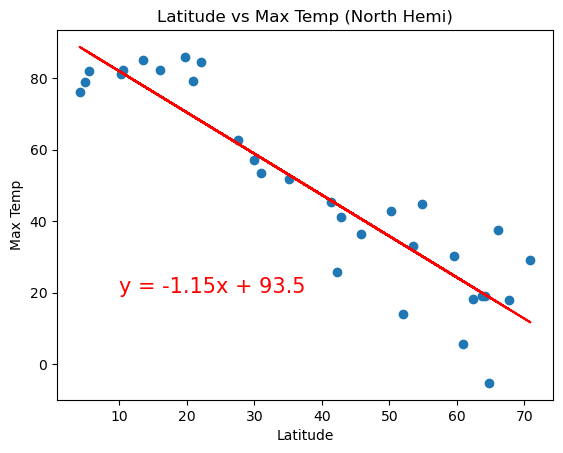

In [26]:
# Linear regression on Northern Hemisphere

# Print out the r-squared value along with the plot.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values, y_values, "Max Temp", "North", (10, 20))

The r-squared is: 0.893502636324427


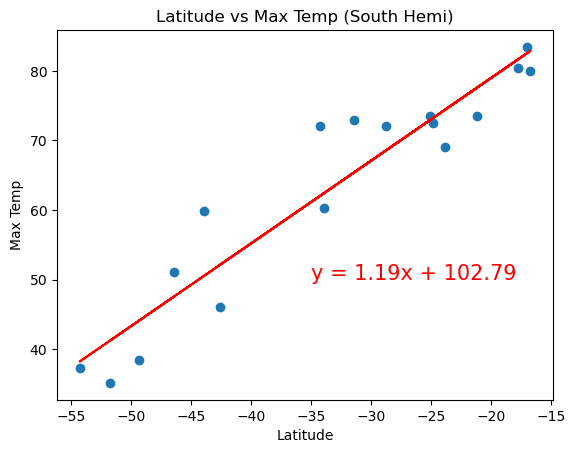

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values, y_values, "Max Temp", "South", (-35, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.008642157362249143


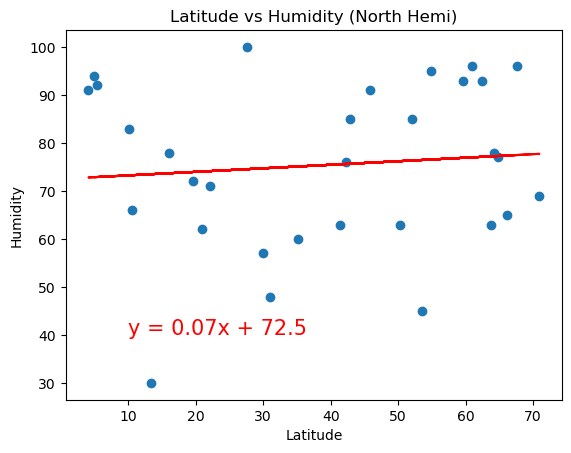

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values, y_values, "Humidity", "North", (10, 40))

The r-squared is: 0.2157371157516949


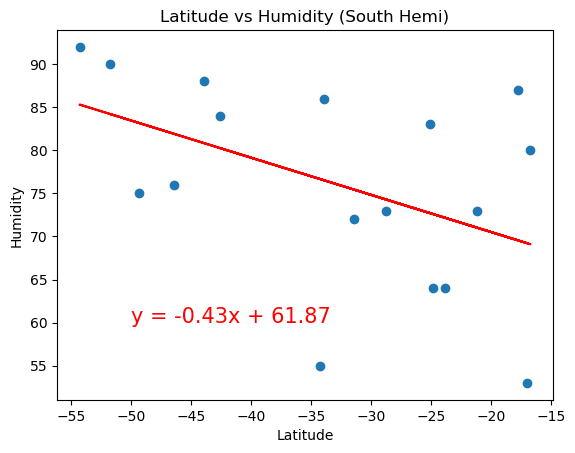

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values, y_values, "Humidity", "South", (-50, 60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.17040244075789346


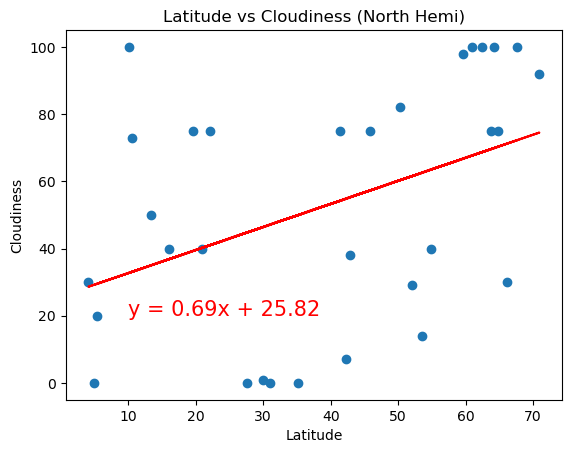

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values, y_values, "Cloudiness", "North", (10, 20))

The r-squared is: 0.0021665997368383303


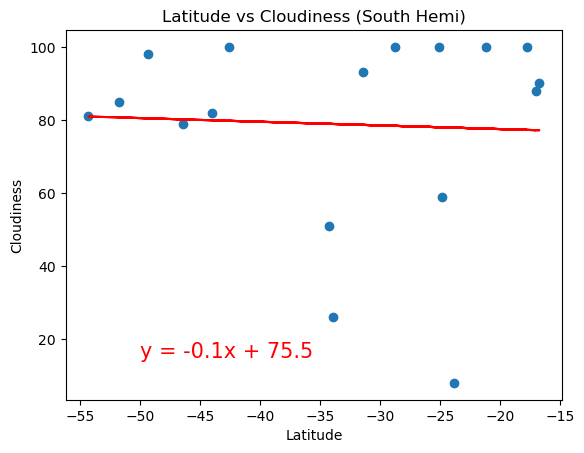

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values, y_values, "Cloudiness", "South", (-50, 15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.025725866206916363


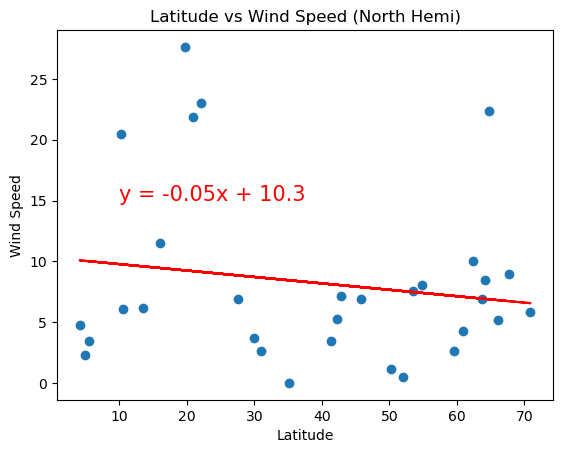

In [32]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values, y_values, "Wind Speed", "North", (10, 15))

The r-squared is: 0.005179651497056886


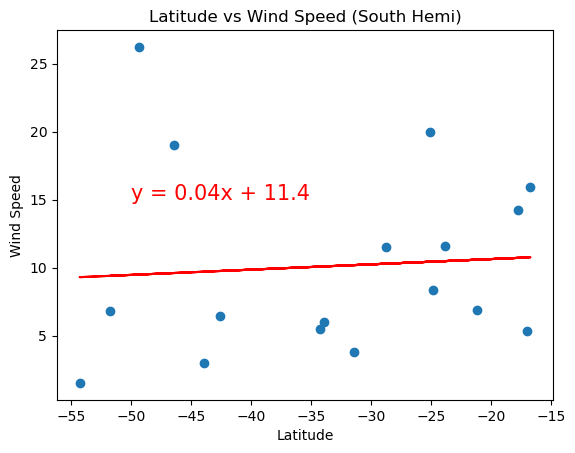

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values, y_values, "Wind Speed", "South", (-50, 15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE